### 603826 坤彩科技
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 25.50% | 21.81% | 20.30% |

##### 2020-11-02
* 最初模版

In [1]:
ticker = '603826'

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils

In [4]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = data.get_market(ticker)
bs = data.get_BS(ticker)

In [5]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.3137,0.3137,"617,005,964 (5.2%)","455,209,661 (13.1%)","146,803,432 (-18.5%)"
2018-12-31,0.3851,0.3851,"586,774,773 (25.1%)","402,492,080 (14.0%)","180,206,645 (52.7%)"
2017-12-31,0.2751,0.2751,"469,163,702 (14.9%)","353,064,612 (21.9%)","118,018,876 (8.5%)"
2016-12-31,0.4028,0.4028,"408,242,753 (24.7%)","289,519,598 (19.8%)","108,748,286 (8.2%)"
2015-12-31,0.3700,0.3700,"327,463,895 (3.9%)","241,741,373 (10.8%)","100,490,428 (21.3%)"
2014-12-31,0.3100,0.3100,"315,078,277 (nan%)","218,241,563 (nan%)","82,873,695 (nan%)"


In [6]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-06-30,"167,307,177 (5.2%)","31,897,920 (-31.3%)"
2020-03-31,"165,421,042 (22.0%)","35,340,026 (1.2%)"
2019-12-31,"177,963,559 (21.2%)","31,749,828 (-21.9%)"
2019-09-30,"144,401,733 (-5.3%)","33,702,604 (-33.0%)"
2019-06-30,"159,077,833 (-6.1%)","46,431,248 (-11.8%)"
2019-03-31,"135,562,839 (14.8%)","34,919,752 (-4.6%)"
2018-12-31,"146,794,764 (15.1%)","40,628,635 (36.3%)"
2018-09-30,"152,495,072 (29.1%)","50,336,672 (92.7%)"
2018-06-30,"169,421,474 (41.8%)","52,653,886 (47.0%)"


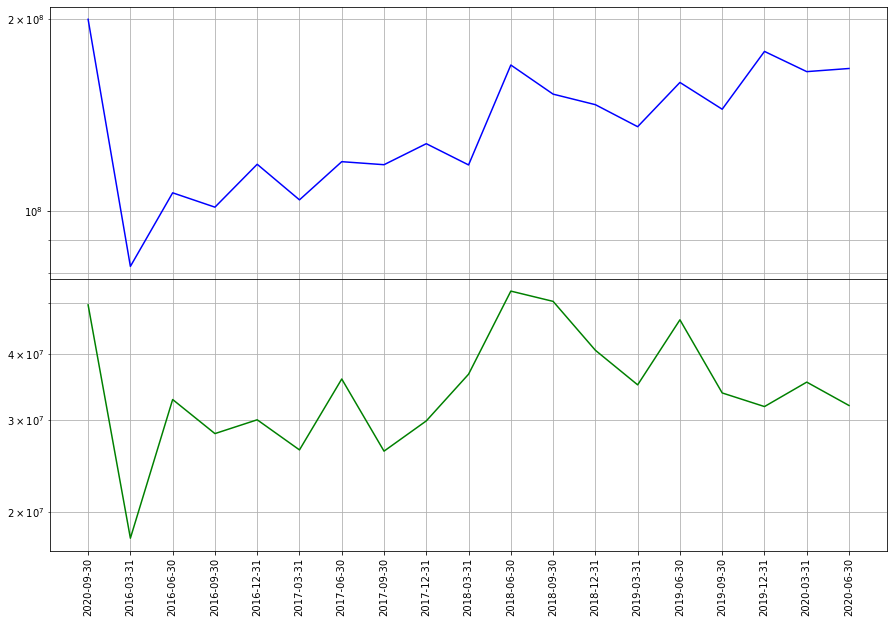

In [7]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,44.6,24.1
2018-12-31,46.1,30.7
2017-12-31,44.9,24.7
2016-12-31,46.9,25.9
2015-12-31,44.2,29.5
2014-12-31,45.9,26.3


In [9]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"617,005,964 (5.2%)","380,029,254 (13.5%)","78,791,453 (74.1%)","122,338,814 (11.1%)"
2018-12-31,"586,774,773 (25.1%)","334,932,584 (51.1%)","45,254,991 (-1.1%)","110,156,856 (10.5%)"
2017-12-31,"469,163,702 (14.9%)","221,589,781 (35.1%)","45,774,389 (-43.9%)","99,724,402 (7.4%)"
2016-12-31,"408,242,753 (24.7%)","163,990,468 (25.1%)","81,553,059 (191.8%)","92,828,356 (35.4%)"
2015-12-31,"327,463,895 (3.9%)","131,122,326 (11.8%)","27,947,436 (76.2%)","68,543,132 (7.7%)"
2014-12-31,"315,078,277 (nan%)","117,321,184 (nan%)","15,864,391 (nan%)","63,614,301 (nan%)"


In [10]:
mkt['前复权'] = mkt['收盘价'] * mkt['累积前复权因子']
mkt['前复权'] = mkt['前复权'].round(2)
mkt['滚动市盈率'] = mkt['滚动市盈率'].round(1)
df = mkt[['收盘价', '滚动市盈率', '前复权']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('收盘价', 'min'), ('收盘价', 'max'), ('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])

收盘价        滚动市盈率           前复权         前复权增长
      first   last   min    max  first   last       
交易日期                                                
2017   9.78  15.39  32.4   86.8   7.41  11.70   57.9
2018  15.82  13.95  33.8   48.5  12.03  13.85   15.1
2019  13.81  16.39  36.9   49.3  13.71  16.39   19.5
2020  16.32  33.57  49.1  128.0  16.32  33.57  105.7

In [25]:
ticker = 'sh.603826'
mkt = data.get_market2(ticker)
mkt['前复权'] = mkt['前复权'].astype('float64').round(2)
mkt['滚动市盈率'] = mkt['滚动市盈率'].astype('float64').round(1)
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])

前复权        滚动市盈率         前复权增长
      first   last   min    max       
交易日期                                  
2017   7.42  11.71  32.4   86.8   57.8
2018  12.03  13.85  33.8   48.5   15.1
2019  13.71  16.39  36.9   49.3   19.5
2020  16.32  38.81  49.1  128.0  137.8

In [21]:
mkt[mkt['滚动市盈率'] == ""]

,通用交易代码,交易日期,前复权,滚动市盈率
3696,sh.000001,2006-01-04,1180.96,
3697,sh.000001,2006-01-05,1197.27,
3698,sh.000001,2006-01-06,1209.42,
3699,sh.000001,2006-01-09,1215.67,
3700,sh.000001,2006-01-10,1220.62,
...,...,...,...,...
13082271,sz.399998,2018-02-28,1770.73,
13082272,sz.399998,2018-03-01,1757.38,
13082273,sz.399998,2018-03-02,1732.07,
13082290,sz.399998,2018-03-27,1570.46,
